In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
# In Jupyter, __file__ is not defined. Use the current working directory instead.
caminho = os.path.join(os.getcwd(), 'Populacao_PresidentePrudente.dat') #Tive que mudar para o .getcwd() para funcionar no Jupyter Notebook,
# pois o __file__ não é definido no Jupyter Notebook. mas no terminal, __file__ funciona normalmente.
# Se você estiver rodando o código fora do Jupyter Notebook, use a linha abaixo:
# caminho = os.path.join(os.path.dirname(__file__), 'Populacao_PresidentePrudente.dat')
dados = np.loadtxt(caminho, skiprows=1)

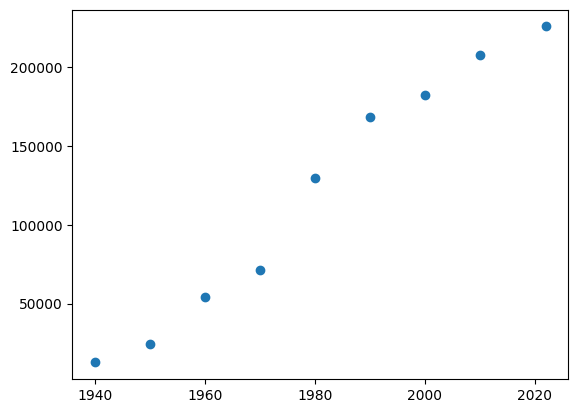

In [10]:
# print(dados)
x = dados[:, 0] # primeira coluna
y = dados[:, 1] # segunda coluna
plt.scatter(x, y) 
plt.show() 

Coeficientes: [ 5.31364420e+09 -8.06339369e+06  4.07689937e+03 -6.86783118e-01]
Valores ajustados: [ 11642.00886822  25387.71506977  50977.04676437  84289.3052454
 121203.79179859 157599.80771732 189356.65429592 212353.63282108
 222585.03744507]


array([ 11642.00886822,  25387.71506977,  50977.04676437,  84289.3052454 ,
       121203.79179859, 157599.80771732, 189356.65429592, 212353.63282108,
       222585.03744507])

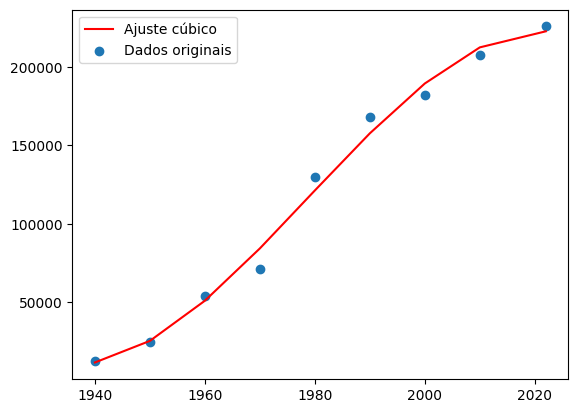

In [24]:
def cubica(x, y):
    e0 = np.ones(len(x))
    e1 = x
    e2 = x**2
    e3 = x**3
    A = np.array([
        [np.dot(e0, e0), np.dot(e0, e1), np.dot(e0, e2), np.dot(e0, e3)],
        [np.dot(e1, e0), np.dot(e1, e1), np.dot(e1, e2), np.dot(e1, e3)],
        [np.dot(e2, e0), np.dot(e2, e1), np.dot(e2, e2), np.dot(e2, e3)],
        [np.dot(e3, e0), np.dot(e3, e1), np.dot(e3, e2), np.dot(e3, e3)]
    ])
    B = np.array([
        np.dot(e0, y),
        np.dot(e1, y),
        np.dot(e2, y),
        np.dot(e3, y)
    ])

    coef = np.linalg.solve(A, B) # coeficientes da função cúbica
    print("Coeficientes:", coef)
    y_fit = coef[0] + coef[1]*x + coef[2]*x**2 + coef[3]*x**3 # função cúbica
    plt.plot(x, y_fit, color='red', label='Ajuste cúbico')
    plt.scatter(x, y, label='Dados originais')
    plt.legend()

    
    print("Valores ajustados:", y_fit)

    
    return y_fit

cubica(x, y)

Coeficientes: [-2.41498278e+07  2.16299786e+04 -4.73304802e+00]
Valores ajustados: [  -968.85  31215.37  62452.98  92743.98 122088.37 150486.15 177937.31
 204441.87 234997.82]


array([  -968.85,  31215.37,  62452.98,  92743.98, 122088.37, 150486.15,
       177937.31, 204441.87, 234997.82])

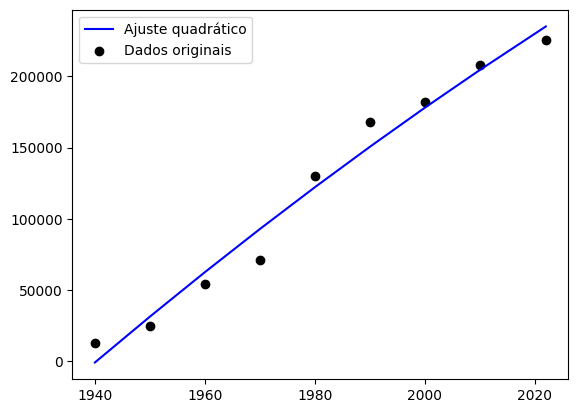

In [12]:
def quadratica(x,y):
    e0 = np.ones(len(x))
    e1 = x
    e2 = x**2
    A = np.array([
        [np.dot(e0, e0), np.dot(e0, e1), np.dot(e0, e2)],
        [np.dot(e1, e0), np.dot(e1, e1), np.dot(e1, e2)],
        [np.dot(e2, e0), np.dot(e2, e1), np.dot(e2, e2)]
    ])
    B = np.array([
        np.dot(e0, y),
        np.dot(e1, y),
        np.dot(e2, y)
    ])

    coef = np.linalg.solve(A, B) # coeficientes da função quadrática, o linag.solve resolve o sistema de equações lineares
    # coef[0] = a0, coef[1] = a1, coef[2] = a2
    print("Coeficientes:", coef)

    y_fit = coef[0] + coef[1]*x + coef[2]*x**2 # função quadrática
    y_fit = np.round(y_fit, 2) # arredondar para duas casas decimais
    plt.plot(x, y_fit, color='blue', label='Ajuste quadrático')
    plt.scatter(x, y, color='black', label='Dados originais')
    plt.legend()

    
    print("Valores ajustados:", y_fit)

    
    return y_fit

quadratica(x, y)


Coeficientes: [-5.74784681e+01  3.47556587e-02]
Valores ajustados: [ 20900.11  29586.29  41882.49  59289.03  83929.82 118811.42 168189.97
 238090.47 361303.6 ]


array([ 20900.11,  29586.29,  41882.49,  59289.03,  83929.82, 118811.42,
       168189.97, 238090.47, 361303.6 ])

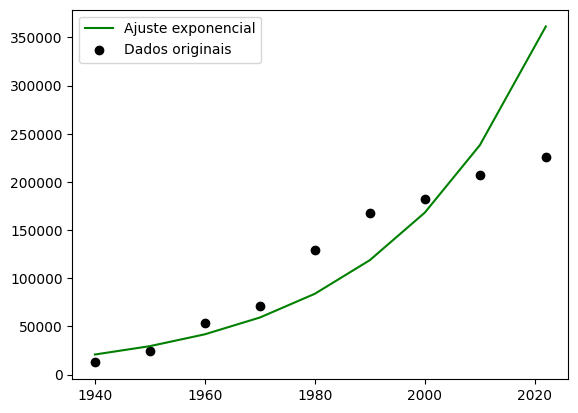

In [13]:
def exponencial(x, y):
    e0 = np.ones(len(x))
    e1 = x

    #Montando a matriz gigante
    A = np.array([
        [np.dot(e0, e0), np.dot(e0, e1)],
        [np.dot(e1, e0), np.dot(e1, e1)]
    ])

    #Montando o vetor B de resultados
    B = np.array([
        np.dot(e0, np.log(y)),
        np.dot(e1, np.log(y))
    ])


    #Resolvendo o sistema de equações lineares
    coef = np.linalg.solve(A, B) # coeficientes da função exponencial
    print("Coeficientes:", coef)

   # função exponencial
   #np.exp serve para calcular a exponencial de um número, ou seja, e^x  
    y_fit = np.exp(coef[0]) * np.exp(coef[1] * x) # função exponencial

    y_fit = np.round(y_fit, 2) # arredondar para duas casas decimais
    plt.plot(x, y_fit, color='green', label='Ajuste exponencial')
    plt.scatter(x, y, color='black', label='Dados originais')
    plt.legend()
    print("Valores ajustados:", y_fit)

    return y_fit

exponencial(x,y)

Coeficientes: [ 1.44647464e-03 -7.20311813e-07]
Valores ajustados: [  20379.17   23885.39   28848.8    36416.12   49365.05   76604.12
  170910.66 -739585.88 -100041.52]


array([  20379.17,   23885.39,   28848.8 ,   36416.12,   49365.05,
         76604.12,  170910.66, -739585.88, -100041.52])

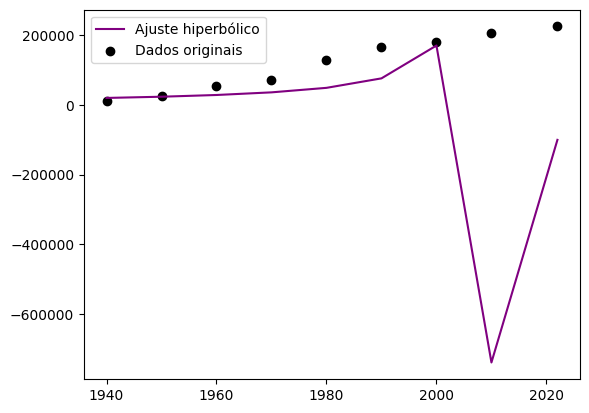

In [14]:
def hiperbolica (x,y):
    e0 = np.ones(len(x))
    e1 = x



    #Montando a matriz gigante
    A = np.array([
        [np.dot(e0, e0), np.dot(e0, e1)],
        [np.dot(e1, e0), np.dot(e1, e1)]
    ])

    #Montando o vetor B de resultados
    B = np.array([
        np.dot(e0, 1/y),
        np.dot(e1, 1/y)
    ])

    #Resolvendo o sistema de equações lineares
    coef = np.linalg.solve(A, B) # coeficientes da função hiperbólica
    print("Coeficientes:", coef)

    #função hiperbólica
    y_fit = 1/(coef[0] + coef[1]*x) # função hiperbólica


    y_fit = np.round(y_fit, 2) # arredondar para duas casas decimais
    plt.plot(x, y_fit, color='purple', label='Ajuste hiperbólico')
    plt.scatter(x, y, color='black', label='Dados originais')
    plt.legend()
    print("Valores ajustados:", y_fit)
    return y_fit

hiperbolica(x, y)

coef[0]: 1.0899799029309053e-25
coef[1]: 1.035366695080545
Valores ajustados: [ 20900.11  29586.29  41882.49  59289.03  83929.82 118811.42 168189.97
 238090.47 361303.6 ]


array([ 20900.11,  29586.29,  41882.49,  59289.03,  83929.82, 118811.42,
       168189.97, 238090.47, 361303.6 ])

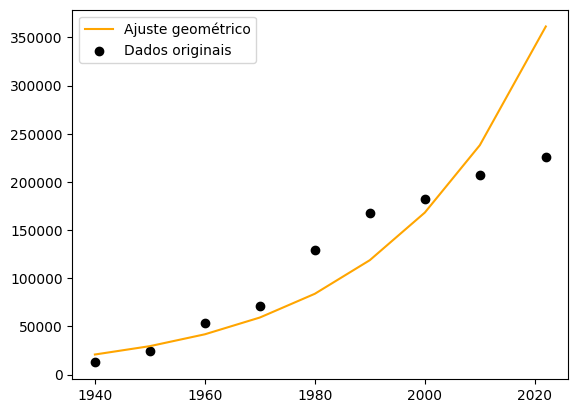

In [15]:
def geometrica(x, y):
    e0 = np.ones(len(x))
    e1 = x

    #Montando a matriz gigante
    A = np.array([
        [np.dot(e0, e0), np.dot(e0, e1)],
        [np.dot(e1, e0), np.dot(e1, e1)]
    ])

    #Montando o vetor B de resultados
    B = np.array([
        np.dot(e0, np.log(y)),
        np.dot(e1, np.log(y))
    ])

    #Resolvendo o sistema de equações lineares
    coef = np.linalg.solve(A, B) # coeficientes da função geométrica

   # função geométrica
   #np.exp serve para calcular a exponencial de um número, ou seja, e^x  
    print("coef[0]:", np.exp(coef[0]))
    print("coef[1]:", np.exp(coef[1]))

    y_fit = np.exp(coef[0]) * (np.exp(coef[1]) ** x) # função geométrica a*x^b 
    y_fit = np.round(y_fit, 2) # arredondar para duas casas decimais
    plt.plot(x, y_fit, color='orange', label='Ajuste geométrico')
    plt.scatter(x, y, color='black', label='Dados originais')
    plt.legend()
    print("Valores ajustados:", y_fit)

    return y_fit

geometrica(x,y)

Coeficientes: [ 5.31364420e+09 -8.06339369e+06  4.07689937e+03 -6.86783118e-01]
Valores ajustados: [ 11642.00886822  25387.71506977  50977.04676437  84289.3052454
 121203.79179859 157599.80771732 189356.65429592 212353.63282108
 222585.03744507]
Coeficientes: [-2.41498278e+07  2.16299786e+04 -4.73304802e+00]
Valores ajustados: [  -968.85  31215.37  62452.98  92743.98 122088.37 150486.15 177937.31
 204441.87 234997.82]
Coeficientes: [-5.74784681e+01  3.47556587e-02]
Valores ajustados: [ 20900.11  29586.29  41882.49  59289.03  83929.82 118811.42 168189.97
 238090.47 361303.6 ]
Coeficientes: [ 1.44647464e-03 -7.20311813e-07]
Valores ajustados: [  20379.17   23885.39   28848.8    36416.12   49365.05   76604.12
  170910.66 -739585.88 -100041.52]
coef[0]: 1.0899799029309053e-25
coef[1]: 1.035366695080545
Valores ajustados: [ 20900.11  29586.29  41882.49  59289.03  83929.82 118811.42 168189.97
 238090.47 361303.6 ]
Coeficiente de determinação da função cúbica: 0.9914431582227229
Coeficiente d

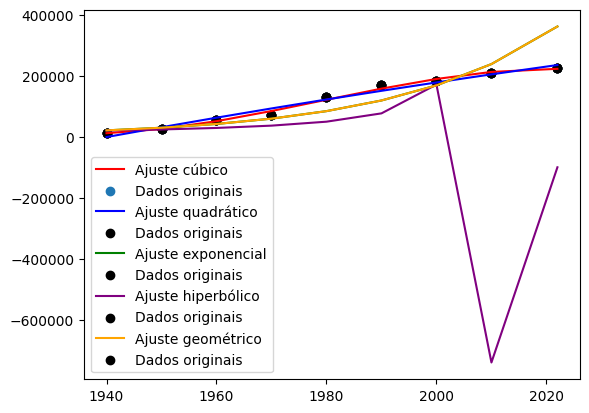

In [29]:
def calcR(y, y_chapeu):
    #Média de y
    y_media = np.mean(y)

    #Soma dos quadrados totais
    ss_total = np.sum((y - y_media)**2) # soma dos quadrados totais

    #Soma dos quadrados residuais
    ss_residual = np.sum((y - y_chapeu)**2) # soma dos quadrados residuais

    #Soma dos quadrados da função cúbica
    sum1 = ss_residual/ss_total

    r = 1-sum1
    return r

def alinhamentoDasAprox (x,y):
    y_chapeu = cubica(x, y)  #resultado
    y_chapeu2 = quadratica(x, y)
    y_chapeu3 = exponencial(x, y)
    y_chapeu4 = hiperbolica(x, y)
    y_chapeu5 = geometrica(x, y)

    r1 = calcR(y, y_chapeu)
    r2 = calcR(y, y_chapeu2)
    r3 = calcR(y, y_chapeu3)
    r4 = calcR(y, y_chapeu4)
    r5 = calcR(y, y_chapeu5)
    
    print("Coeficiente de determinação da função cúbica:", r1)
    print("Coeficiente de determinação da função quadrática:", r2)
    print("Coeficiente de determinação da função exponencial:", r3)
    print("Coeficiente de determinação da função hiperbólica:", r4)
    print("Coeficiente de determinação da função geométrica:", r5)

alinhamentoDasAprox(x, y)

In [31]:
def c(x,y):
    e0 = np.ones(len(x))
    e1 = x
    e2 = x**2
    e3 = x**3
    A = np.array([
        [np.dot(e0, e0), np.dot(e0, e1), np.dot(e0, e2), np.dot(e0, e3)],
        [np.dot(e1, e0), np.dot(e1, e1), np.dot(e1, e2), np.dot(e1, e3)],
        [np.dot(e2, e0), np.dot(e2, e1), np.dot(e2, e2), np.dot(e2, e3)],
        [np.dot(e3, e0), np.dot(e3, e1), np.dot(e3, e2), np.dot(e3, e3)]
    ])
    B = np.array([
        np.dot(e0, y),
        np.dot(e1, y),
        np.dot(e2, y),
        np.dot(e3, y)
    ])

    coef = np.linalg.solve(A, B) # coeficientes da função cúbica

    print("Coeficientes:", coef)

    res = coef[0] + coef[1]*2030 + coef[2]*2030**2 + coef[3]*2030**3 # função cúbica

    print("Valor ajustado:", res)

c(x, y)




    

Coeficientes: [ 5.31364420e+09 -8.06339369e+06  4.07689937e+03 -6.86783118e-01]
Valor ajustado: 215585.19088840485
